Question 1

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Making random data beacuse dataset didnt work from link in manual
data = pd.DataFrame({
    'cylinders': [4, 6, 8, 4, 4, 8, 6, 4, 8, 4],
    'displacement': [140, 250, 350, 120, 113, 360, 198, 97, 390, 98],
    'horsepower': [90, 105, np.nan, 88, 95, 175, np.nan, 75, 190, np.nan],
    'weight': [2264, 3282, 3693, 2300, 2130, 3850, 3100, 1850, 4000, 1800],
    'acceleration': [15.5, 15.0, 14.0, 16.0, 17.0, 13.0, 15.5, 18.0, 12.5, 18.5],
    'model_year': [70, 71, 70, 72, 73, 71, 72, 74, 70, 75],
    'origin': [1, 1, 1, 2, 3, 1, 1, 2, 1, 3],
    'car_name': ['ford', 'chevy', 'dodge', 'toyota', 'honda', 'ford', 'chevy', 'honda', 'dodge', 'toyota'],
    'mpg': [30, 22, 15, 35, 36, 14, 20, 40, 12, 38]
})

data_cleaned = data.dropna()

data_cleaned = pd.get_dummies(data_cleaned, columns=['car_name'], drop_first=True)

X = data_cleaned.drop('mpg', axis=1)
y = data_cleaned['mpg']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

LR=LinearRegression()
model=LR.fit(x_train,y_train)


predicted_mpg=model.predict(x_test)

print("Y_test",y_test)
print("predicted",predicted_mpg)



r2score=r2_score(y_test,predicted_mpg)
print("r^2:",r2score)
mse=mean_squared_error(y_test,predicted_mpg)
print("Mean Squared Error:",mse)


Y_test 0    30
1    22
Name: mpg, dtype: int64
predicted [35.49062021 24.09216575]
r^2: -0.07887711826112409
Mean Squared Error: 17.262033892177985


Question 2

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('./SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])
#print(df.head())

y = (df['label'] == 'spam').astype(int)

vectorize = TfidfVectorizer()
X = vectorize.fit_transform(df['message'])

SS = StandardScaler(with_mean=False)
x_scaled = SS.fit_transform(X.toarray())

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

svc = SVC(kernel='rbf', C=1, gamma='scale')
svc.fit(x_train, y_train)

predicted = svc.predict(x_test)

accuracy = accuracy_score(y_test, predicted)
confusion = confusion_matrix(y_test, predicted)
report = classification_report(y_test, predicted)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)


Accuracy: 0.9228699551569507

Confusion Matrix:
 [[966   0]
 [ 86  63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       966
           1       1.00      0.42      0.59       149

    accuracy                           0.92      1115
   macro avg       0.96      0.71      0.78      1115
weighted avg       0.93      0.92      0.91      1115



Question 3

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#print('hello')
err_data=pd.read_csv('./Mall_Customers.csv.xls')
err_data.head()
data=err_data.dropna()
data.head()

y=(data['Spending Score (1-100)']>50).astype(int)
LE=LabelEncoder()
data['Gender']=LE.fit_transform(data['Gender'])
X=data.drop('Spending Score (1-100)',axis=1)
DT=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=DT.fit(x_train,y_train)
predict_train=model.predict(x_train)
accuracy_train=accuracy_score(y_train,predict_train)
predict_test=model.predict(x_test)
accuracy_test=accuracy_score(y_test,predict_test)
print("accuracy_train",accuracy_train)
print("accuracy_test",accuracy_test)



accuracy_train 1.0
accuracy_test 0.675


Question 4

MSE 425.5402976300801
r2 0.04750992111839425


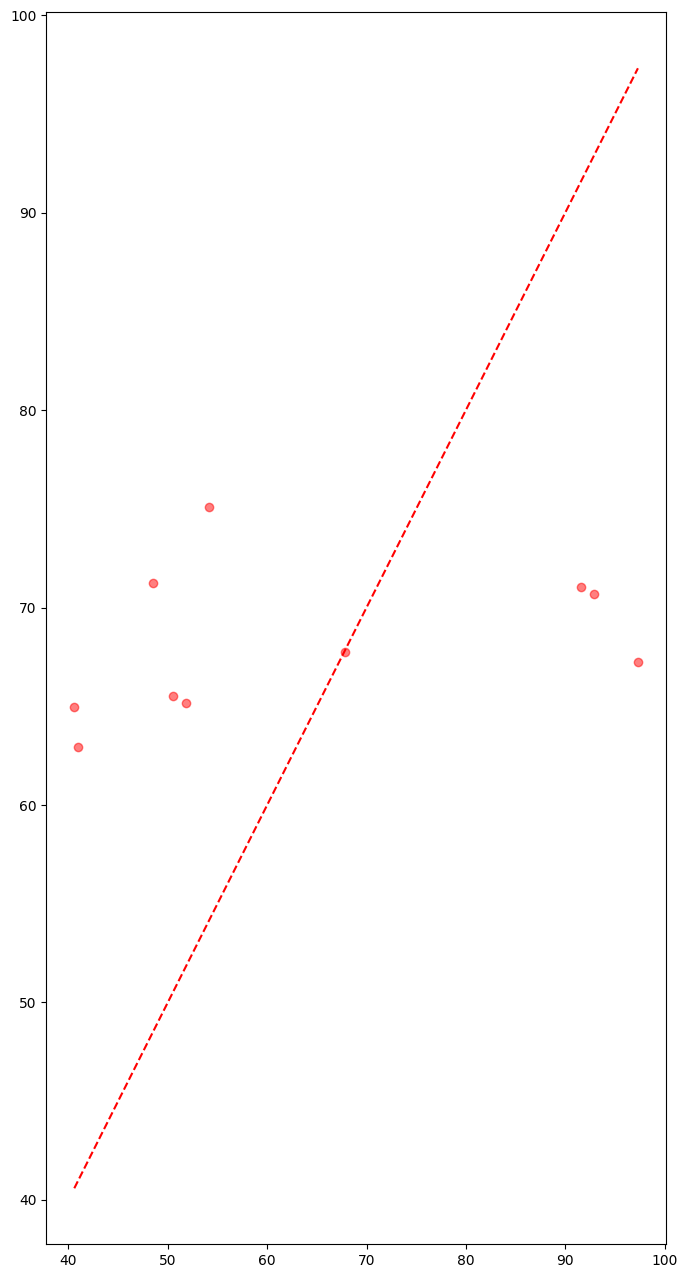

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
df = pd.DataFrame({
    'Hours_Studied': np.random.uniform(0, 10, 50),
    'Attendance_Percentage': np.random.uniform(50, 100, 50),
    'Assignments_Completed': np.random.randint(5, 10, 50),
    'Final_Score': np.random.uniform(40, 100, 50)
})

X=df.drop('Final_Score',axis=1)
y=df['Final_Score']
LR=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LR.fit(x_train,y_train)
pred_y=model.predict(x_test)
mse=mean_squared_error(y_test,pred_y)
r2=r2_score(y_test,pred_y)

print("MSE",mse)
print("r2",r2)


plt.figure(figsize=(8,16))
plt.scatter(y_test,pred_y,color="red",alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


Question 5

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

data = load_breast_cancer()
X = data.data
y = data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel="linear", C=1, gamma="scale")
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nSVM Model Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))

print("\nDecision Tree Model Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))



SVM Model Metrics:
Accuracy: 0.956140350877193
Precision: 0.9714285714285714
Recall: 0.9577464788732394
F1 Score: 0.9645390070921985

Decision Tree Model Metrics:
Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394
